In [1]:
import os
import sys
import shutil
import glob
import importlib

#import random

import numpy as np
import librosa
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split

#import IPython

repos_dir = r'/home/akikun/repos'
sys.path.append(repos_dir)
from sak import display as dp
from sak import signal_processing as sp

#imgan_dir = os.path.join(repos_dir, 'Intelligibility-MetricGAN')
#sys.path.append(imgan_dir)
#import default_settings as default
#import audio_util as au

In [31]:
hikari_tts_dir = r'/home/common/db/audio_corpora/nele/hikari_tts/wavs_normalized'
wav_paths = glob.glob(os.path.join(hikari_tts_dir, '*.wav'))
wav_paths.sort()
wav_path = wav_paths[0]

frame_length=1024 #--> 1024/44.1=22.6[ms]
hop_length=512 #--> 512/44.1=11.6[ms]
sampling_rate=44100

In [50]:
y_ = sp.load_wav(wav_path, sampling_rate=sampling_rate)
y = y_[40000:70000]

def zero_runs(a):
    ''' 
    find consecutive 0s.
    
    Reference: https://stackoverflow.com/questions/24885092/finding-the-consecutive-zeros-in-a-numpy-array
    '''
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

threshold = hop_length
# start and end index of consecutive 0s. 
zr = zero_runs(y[:sampling_rate])
# duration of consecutive 0s.
zero_duration = zr[:, 1]-zr[:, 0]

sils = zr[zero_duration > hop_length]
if np.shape(sils)[0] == 1:
    silB = sils[0]
silB
#plt.plot(y)
#dp.disp_wav(y, sampling_rate=44100)

array([   0, 1680])

In [4]:
def shift_frame(y, frame_length=2048, hop_length=512):
    t = np.arange(len(y))
    hop_length_2 = round(hop_length/2)
    frame_starts = t[::hop_length]
    y2 = np.r_[y, y, y]
    for frame_start in frame_starts:
        yield y2[len(y) + frame_start - hop_length_2:len(y) + frame_start + hop_length_2]
        
rms_ = []
for frame in shift_frame(y):
    rms_.extend(sp.get_rms(frame)[1])
rms_

[0.00010018231,
 0.0,
 0.0,
 6.9980088e-06,
 4.542356e-05,
 0.00017092701,
 0.00054975564,
 0.003237825,
 0.0033770944,
 0.004240599,
 0.0048122387,
 0.005996251,
 0.0040550507,
 0.018133754,
 0.025623742,
 0.028581882,
 0.028908415,
 0.028434847,
 0.026252395,
 0.030814204,
 0.033064924,
 0.03030593,
 0.029360216,
 0.035161994,
 0.035461638,
 0.038763966,
 0.0378432,
 0.03575897,
 0.032470796,
 0.02485709,
 0.019674959,
 0.024571504,
 0.024443692,
 0.02425025,
 0.019853303,
 0.027966553,
 0.030415121,
 0.029946106,
 0.029107679,
 0.024324385,
 0.01898281,
 0.0072820038,
 0.00087889336,
 7.239919e-05,
 3.4087774e-05,
 8.171797e-05,
 0.00015479302,
 0.003875989,
 0.02305483,
 0.023070717,
 0.021983635,
 0.02411096,
 0.019307274,
 0.013425892,
 0.0036502313,
 0.0004269821,
 0.00019640339,
 0.00017835358,
 0.00015363882]

In [29]:

z = sp.get_zero_crossings(y, frame_length=frame_length, hop_length=hop_length, center=True)
rms = sp.get_rms(y, frame_length=frame_length, hop_length=hop_length, center=True)
#z = librosa.core.zero_crossings(y, threshold=1e-10, ref_magnitude=None, pad=True, zero_pos=True, axis=-1)
len(z)
z==0

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

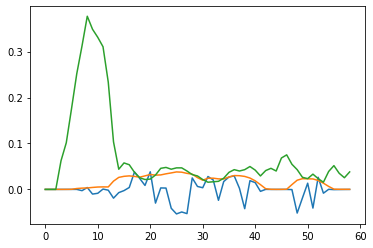

In [27]:
y_disp = y[::hop_length]
plt.plot(y_disp)
plt.plot(rms)
plt.plot(z)